In [1]:
import pandas as pd 
import os
import tensorflow as tf
import collections 
from PIL import Image
import cv2
import numpy as np

In [2]:
file_path = open('/home/novelty/CPP/report.txt', mode='r')
file_ = file_path.readlines()
dic = {'filename':[], 'width':[], 'height':[], 'class':[], 'xmin':[], 'ymin':[], 'xmax':[], 'ymax':[]}
column_names = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
class_name = 'car plate'
images_path = '/home/novelty/CPP/EfficientDet/efficientdet/annotated'
images = {f'{image_name}': image_name for image_name in os.listdir(images_path)}
data_size = len(file_)//4
print('data_size: ', data_size)

for i, line in enumerate(file_):
    if i==0:
        continue
    index, file_name, xmin, ymin, bbox_width, bbox_height = line.split(',')
    xmin, ymin, bbox_width, bbox_height = int(xmin), int(ymin), int(bbox_width), int(bbox_height)
    xmax, ymax = xmin+bbox_width, ymin+bbox_height
    info =  [file_name, bbox_width, bbox_height, class_name, xmin, ymin, xmax, ymax]
    for column_name, value in zip(column_names, info):
        dic[column_name]+=[value]
    if i == data_size:
        break

dataframe = pd.DataFrame(dic)
dataframe.head()

data_size:  4897


,filename,width,height,class,xmin,ymin,xmax,ymax
0,1#01AAS545#05062020#104312.jpg,212,37,car plate,824,639,1036,676
1,1#01ACB811#06062020#032814.jpg,201,33,car plate,794,623,995,656
2,1#01AEE23#07062020#141248.jpg,136,27,car plate,477,596,613,623
3,1#01AU833#08062020#142446.jpg,156,25,car plate,522,601,678,626
4,1#01AZJ34#06062020#032800.jpg,211,34,car plate,750,598,961,632


In [3]:
!python -V

Python 3.6.12 :: Anaconda, Inc.


In [5]:
def draw_boxes(image_name):
    selected_value = dataframe[dataframe.filename == image_name]
    img = cv2.imread('/home/novelty/CPP/EfficientDet/efficientdet/annotated/{}'.format(image_name))
    for index, row in selected_value.iterrows():
        img = cv2.rectangle(img, (row['xmin'], row['ymin']), (row['xmax'], row['ymax']), (0, 255, 0), 3)
    return img

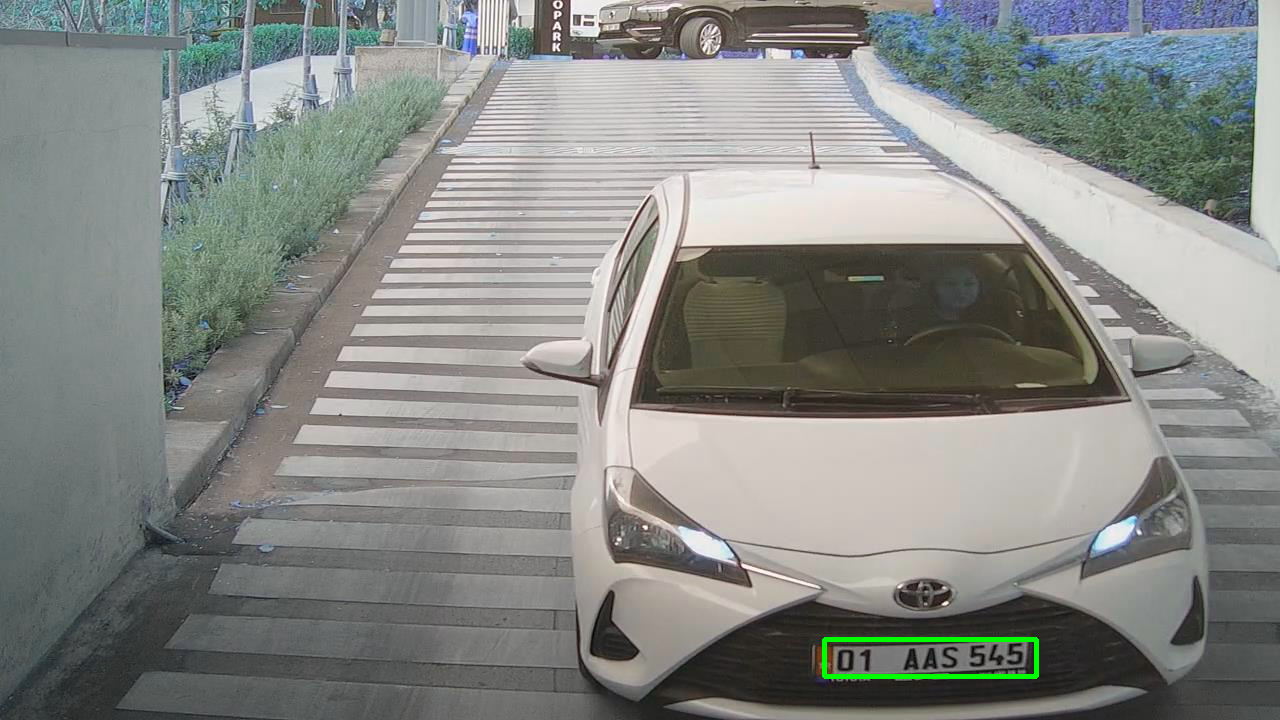

In [6]:
Image.fromarray(draw_boxes('1#01AAS545#05062020#104312.jpg'))

In [7]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(dataframe, shuffle=True,test_size=0.2)

In [52]:
train.to_csv('car_plate_data/train.csv', header=True, index=False)
test.to_csv('car_plate_data/test.csv', header=True, index=False)

In [89]:
print('train size:', train.shape, 'test size:', test.shape)

train size: (3917, 8) test size: (980, 8)


In [10]:
import os 
import tensorflow as tf
assert tf.test.is_gpu_available()
assert tf.test.is_built_with_cuda()

In [38]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [85]:
# train[train.index == 9].filename.iloc[0]
# for i, (image_name, annotations_ids) in enumerate(registered_images.items()):
#     print(i, image_name, annotations_ids)
#     if i == 2:
#         break

registered_images_test = {}

for i, row in train.iterrows():
    image_name = row['filename']
    if image_name in registered_images_test:
        registered_images_test[f'{image_name}'] += 1
    registered_images_test[f'{image_name}'] = 0

'1#26BU823#08062020#055749.jpg'

In [97]:
import datetime
import json
import os
import re
import fnmatch
from PIL import Image
import numpy as np
from pycococreator.pycococreatortools import pycococreatortools

In [92]:
registered_images_test = {}

for i, row in test.iterrows():
    image_name = row['filename']
    if image_name in registered_images_test:
        registered_images_test[f'{image_name}'] += 1
    registered_images_test[f'{image_name}'] = 0


In [93]:
annotation_path = '/home/novelty/CPP/EfficientDet/Yet-Another-EfficientDet-Pytorch/dataset/test_masks'
target_img_path = '/home/novelty/CPP/EfficientDet/Yet-Another-EfficientDet-Pytorch/dataset/test_data'
object_class_name = 'carplate'
import shutil

for index, (_, annotations_ids) in enumerate(registered_images_test.items()):
    for annotation_id in range(annotations_ids+1):
        row = test[test.index == index]
        image_name = row.filename.iloc[0]
        filename = f'{images_path}/{image_name}'
        im = cv2.imread(filename)
        im = np.zeros_like(im)
        cv2.rectangle(im, (row['xmin'], row['ymin']), (row['xmax'], row['ymax']), (255, 255, 255), -1)
        cv2.imwrite(f'{annotation_path}/{index}_{object_class_name}_{annotation_id}.png', im)
        shutil.copy(f'{images_path}/{image_name}', f'{target_img_path}/{index}.jpg')
    # if index == 3:
    #     break
# masked_data = cv2.bitwise_and(im, im, mask=rectangle)

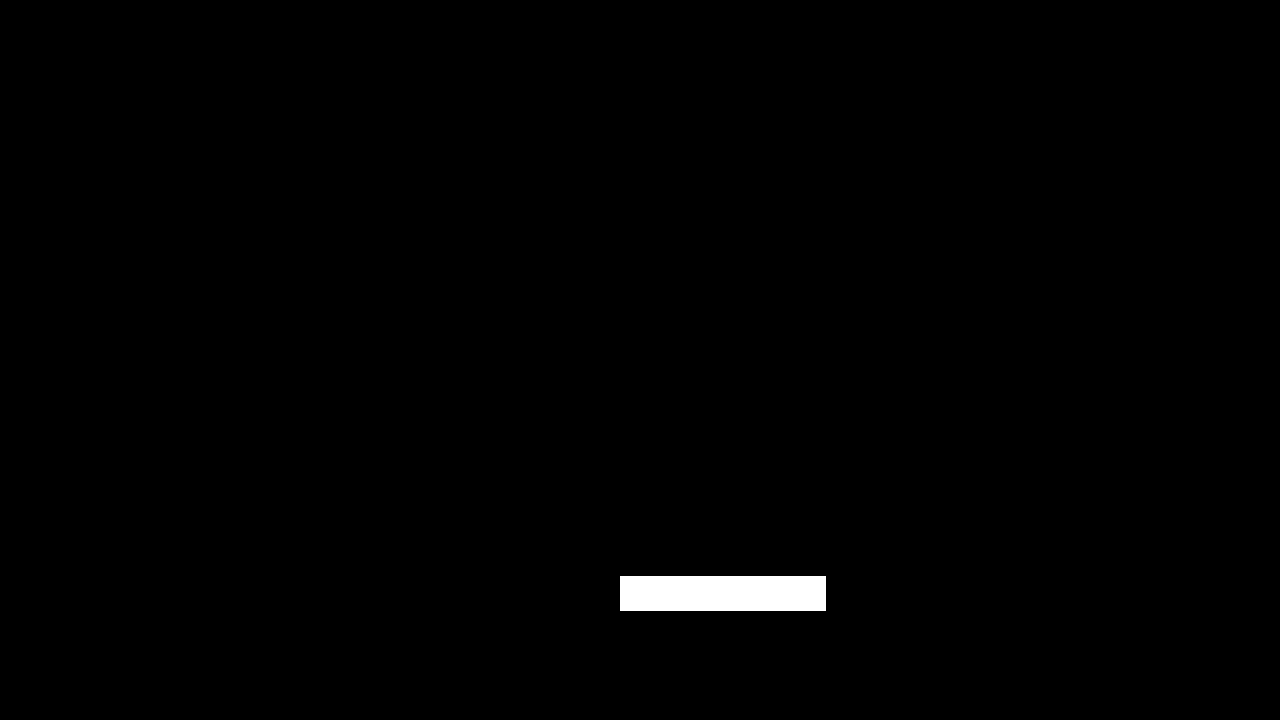

In [87]:
Image.fromarray(im)

In [30]:
# if 'VOCdevkit' not in os.listdir():
#   !wget http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar
#   !tar xf VOCtrainval_11-May-2012.tar

#   !mkdir tfrecord
#   !PYTHONPATH=".:$PYTHONPATH"  python dataset/create_pascal_tfrecord.py  \
#     --data_dir=VOCdevkit --year=VOC2012  --output_path=tfrecord/pascal

# # Pascal has 5717 train images with 100 shards epoch, here we use a single shard
# # for demo, but users should use all shards pascal-*-of-00100.tfrecord.
# file_pattern = 'train.tfrecord'  # @param
# images_per_epoch = 57 * len(tf.io.gfile.glob('tfrecord/' + file_pattern))
# images_per_epoch = images_per_epoch // 8 * 8  # round to 64.
# print('images_per_epoch = {}'.format(images_per_epoch))